In [3]:
pip install pysolar

Note: you may need to restart the kernel to use updated packages.


Sun Elevation:  68.04980378804093  degrees
Sun Azimuth:  256.84035126778065  degrees
Angle between (x1,y1) and (x2,y2) i.e Angle2n: 312.3245733439708 degrees
Angle between (x1,y1) and (x3,y3): i.e angle3n 222.5529513576764 degrees
angle_3n: 222.5529513576764
angle_2n: 312.3245733439708
Time:  2023-07-15 14:00:00
Shadow Azimuth:- TRUE


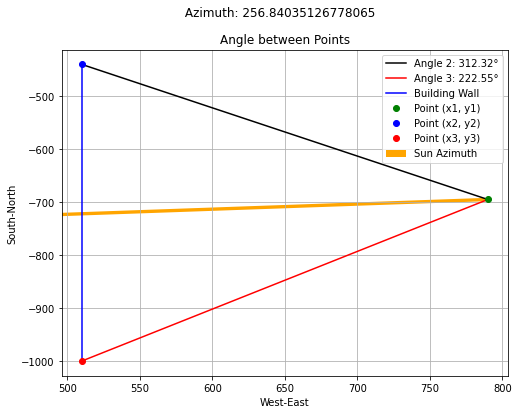

In [4]:
import math
import matplotlib.pyplot as plt
import pytz
import pysolar.solar as ps
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def angle_between_points(x1, y1, x2, y2):
    delta_x = x2 - x1
    # print('Delta_x:',delta_x)
    delta_y = y2 - y1
    # print("Delta_y:",delta_y)
    angle_rad = math.atan2(delta_y, delta_x)
    # print('Angle_rad:',angle_rad)
    angle_deg = math.degrees(angle_rad)
    # print('Angle_deg:', angle_deg)
    return angle_deg

def get_sun_data(latitude, longitude, date_time):
    # Convert date and time to datetime object
    timezone = pytz.timezone('Asia/Kolkata')

    # # Convert date_time to timezone
    date_time_local = timezone.localize(date_time)

    # # Calculate sun position using pysolar
    sun_elevation = ps.get_altitude(latitude, longitude, date_time_local)
    sun_azimuth = ps.get_azimuth(latitude, longitude, date_time_local)

    return sun_elevation, sun_azimuth

def shadow_output(angle1,azimuth,angle2):
    if angle1<= azimuth <=angle2 or angle1 >= azimuth >= angle2:
        return 'TRUE'
    else:
        return 'FALSE'

def spherical_to_cartesian(elevation, azimuth):
    r = 10000
    x = r * np.sin(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation))
    y = r * np.cos(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation))
    z = r * np.sin(np.deg2rad(elevation))
    return x, y, z

latitude = 28.4595
longitude = 77.0266

time = datetime.datetime(2023, 7, 15, 14, 0, 0)

elevation,azimuth=get_sun_data(latitude,longitude,time)
print("Sun Elevation: ", elevation," degrees")
print("Sun Azimuth: ", azimuth," degrees")

elevation_rad, azimuth_rad = np.deg2rad(elevation), np.deg2rad(azimuth)
# sun_x, sun_y, sun_z = spherical_to_cartesian(elevation_rad, azimuth_rad)
# Example usage:
x1, y1 = 790,-695   #Observer Wall Point 1
x2, y2 = 510,-440   #Obstacle Wall Point 1
x3 ,y3 = 510,-1000      #Obstacle Wall Point 2
angle_2 = angle_between_points(x1, y1, x2, y2)
if angle_2 > 90 and angle_2 < 180:
    angle_2n= (450-angle_2) % 360
else:
    angle_2n=90-angle_2

angle_3=angle_between_points(x1, y1, x3, y3)
if angle_3 > 90 and angle_3 < 180:
    angle_3n= (450-angle_3) % 360
else:
    angle_3n=90-angle_3
print("Angle between (x1,y1) and (x2,y2) i.e Angle2n:", angle_2n, "degrees")
print("Angle between (x1,y1) and (x3,y3): i.e angle3n", angle_3n, "degrees")
# print("Angle between (x1,y1) and (x2,y2) i.e Angle2:", angle_2, "degrees")
# print("Angle between (x1,y1) and (x3,y3): i.e angle3", angle_3, "degrees")

shadow_status=shadow_output(angle_2n,azimuth,angle_3n)
print('angle_3n:',angle_3n)
print('angle_2n:',angle_2n)
print('Time: ', time)
print("Shadow Azimuth:-",shadow_status)



#Plotting
sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot([x1, x2], [y1, y2], 'k', label=f'Angle 2: {angle_2n:.2f}°')
plt.plot([x1, x3], [y1, y3], 'r-', label=f'Angle 3: {angle_3n:.2f}°')
plt.plot([x2, x3], [y2, y3], 'b-', label='Building Wall')
# plt.plot(x1,azimuth,label='Azimuth angle')
plt.plot(x1, y1, 'go', label='Point (x1, y1)')
plt.plot(x2, y2, 'bo', label='Point (x2, y2)')
plt.plot(x3, y3, 'ro', label='Point (x3, y3)')
plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=0.2,color='orange', label='Sun Azimuth')
plt.xlabel('West-East')
plt.ylabel('South-North')
plt.title('Angle between Points')
plt.legend()
plt.suptitle(f" Azimuth: {azimuth}")

plt.grid(True)
plt.show()


FALSE, Back (Single)

In [52]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\TRUE Ofob'
os.makedirs(output_dir, exist_ok=True)

# Observer Wall Points
x1, y1 = 360, -635   # Observer Wall Point 1
x1b, y1b = 360, -830 # Observer Wall Point 2 (another observer point)
# Obstacle Wall Points
x2, y2 = 520, -245   # Obstacle Wall Point 1
x3, y3 = 215, -245   # Obstacle Wall Point 2

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
     # Adjust back and front angles to be in the range [0, 360]
    angle_front = angle_front % 360
    angle_back = angle_back % 360
    sun_azimuth = sun_azimuth % 360
    
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: Fals

Time: 18:15
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 18:30
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False
Time: 18:45
Observer 1 -> Front Angle: 22.31°, Back Angle: -339.61°, Shadow Status: False
Observer 2 -> Front Angle: 15.30°, Back Angle: -346.08°, Shadow Status: False


#True, OfOb

In [53]:
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

# Define observer and obstacle points
observer_points = [(510, -830, 100), (360, -830, 100)]  # Two observer points
x2, y2, z2 = 290, -1300, 100  # Obstacle wall point 1
x3, y3, z3 = 290, -1200, 100  # Obstacle wall point 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\FALSE Back'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: Fals

Time: 18:30
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False
Time: 18:45
Observer 1 -> Front Angle: 186.01°, Back Angle: 187.06°, Shadow Status: False
Observer 2 -> Front Angle: 190.71°, Back Angle: 188.47°, Shadow Status: False


#FALSE, Back

In [54]:
# Observer and obstacle points
# Observer Wall Points
x1, y1 = 360, -635   # Observer Wall Point 1
x1b, y1b = 360, -830 # Observer Wall Point 2 (another observer point)
# Obstacle Wall Points
x2, y2 = 510, -440   # Obstacle Wall Point 1
x3 ,y3 = 510, -635  # Obstacle Wall Point 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\FALSE Front'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False
Time: 7:30
Observer 1 

Time: 18:45
Observer 1 -> Front Angle: 90.00°, Back Angle: 37.57°, Shadow Status: False
Observer 2 -> Front Angle: 21.04°, Back Angle: 37.57°, Shadow Status: False


#FALSE, Front

In [55]:
# Observer and obstacle points
# Observer Wall Points
x1, y1 = 360, -830   # Observer Wall Point 1
x1b, y1b = 510, -830 # Observer Wall Point 2 (another observer point)
# Obstacle Wall Points
x2, y2 = 510, -440   # Obstacle Wall Point 1
x3 ,y3 = 510, -635  # Obstacle Wall Point 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\TRUE Front'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 7:30
Observer 1 -> Fro

Time: 18:45
Observer 1 -> Front Angle: 37.57°, Back Angle: 21.04°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False


#TRUE, Front

In [56]:
# Observer and obstacle points
# Observer Wall Points
x1, y1 = 510, -635   # Observer Wall Point 1
x1b, y1b = 510, -830 # Observer Wall Point 2 (another observer point)
# Obstacle Wall Points
x2, y2 = 510, -440   # Obstacle Wall Point 1
x3 ,y3 = 510, -634  # Obstacle Wall Point 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\FALSE Ofob'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Time: 7:30
Observer 1 -> Front Ang

Time: 18:45
Observer 1 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -0.00°, Shadow Status: False


#FALSE, One Vertex at Front and one at Back

In [8]:
|

In [9]:
pip install pysolar

Sun Elevation:  68.04980378804093  degrees
Sun Azimuth:  256.84035126778065  degrees
Time: 6:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


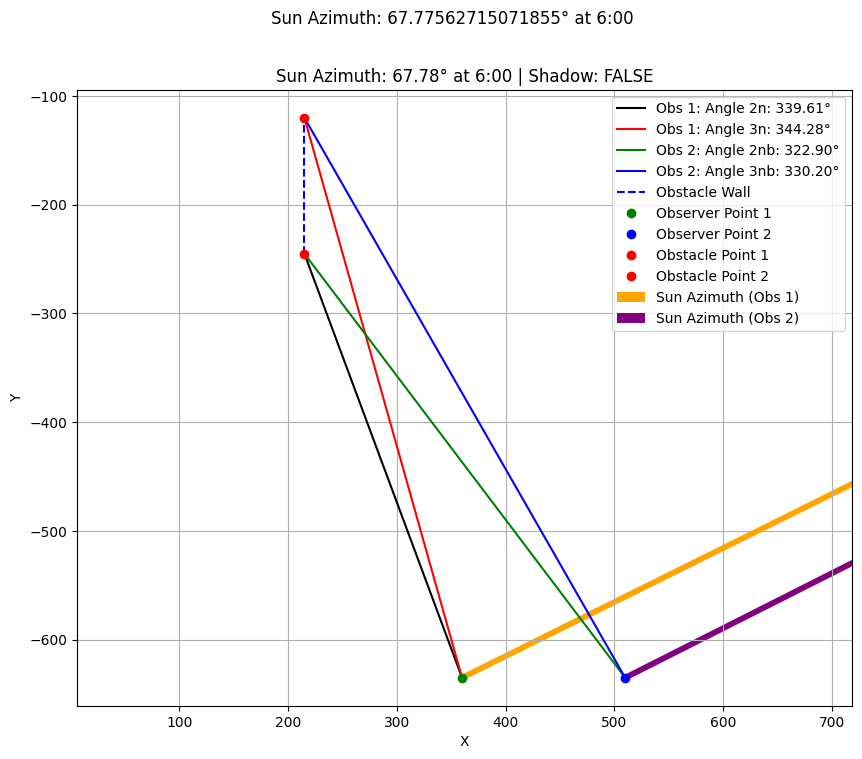

Time: 7:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


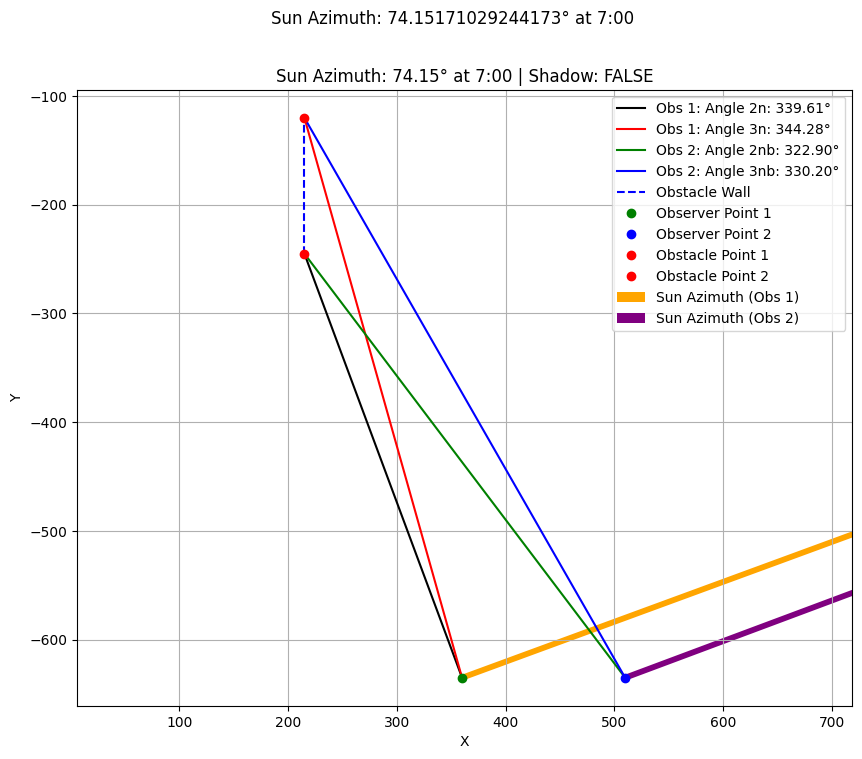

Time: 8:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


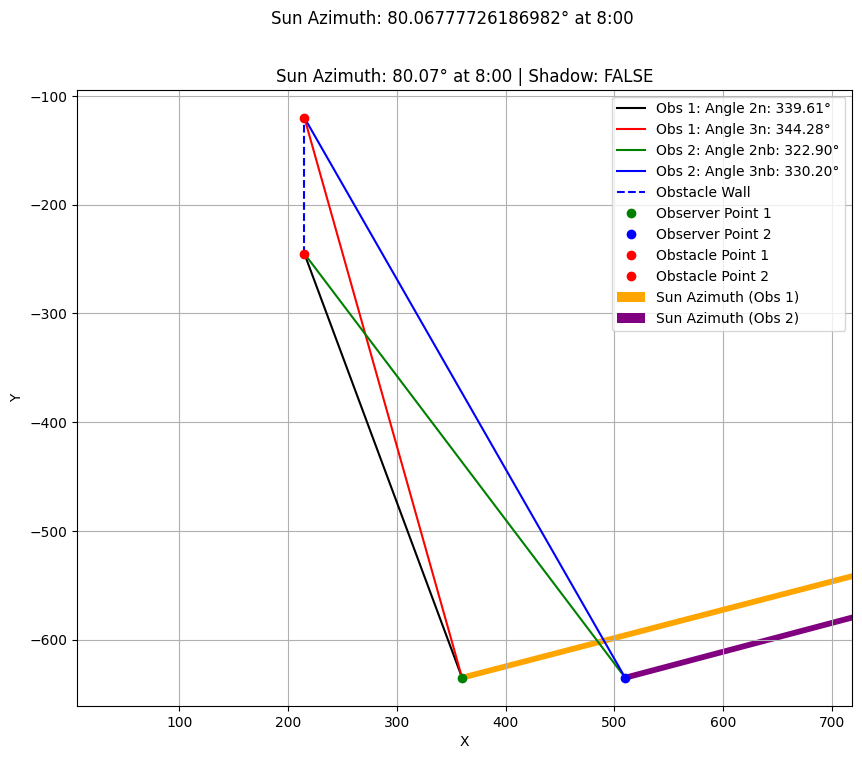

Time: 9:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


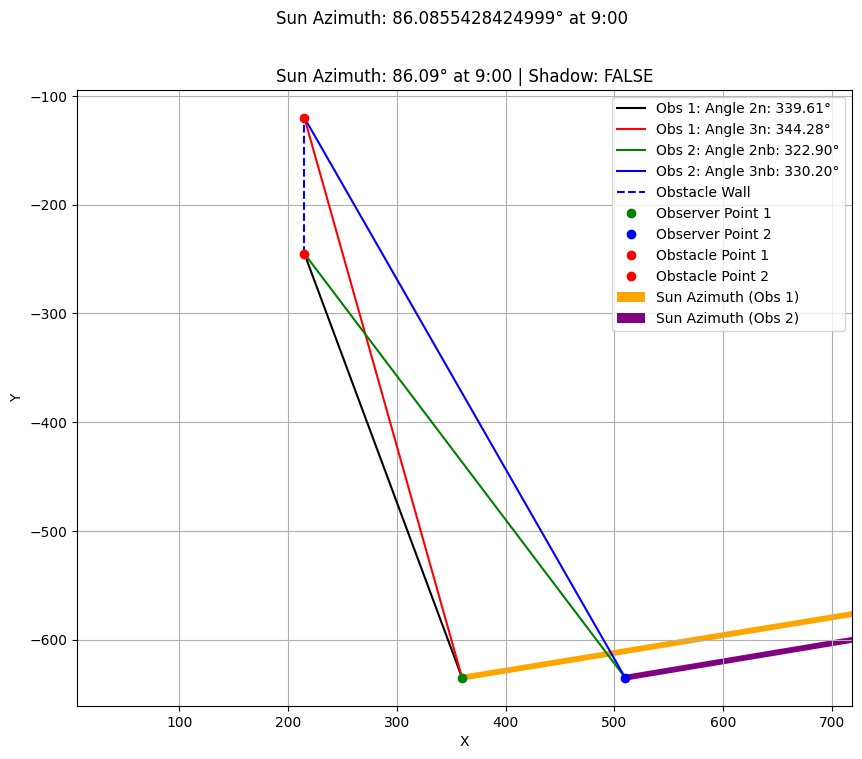

Time: 10:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


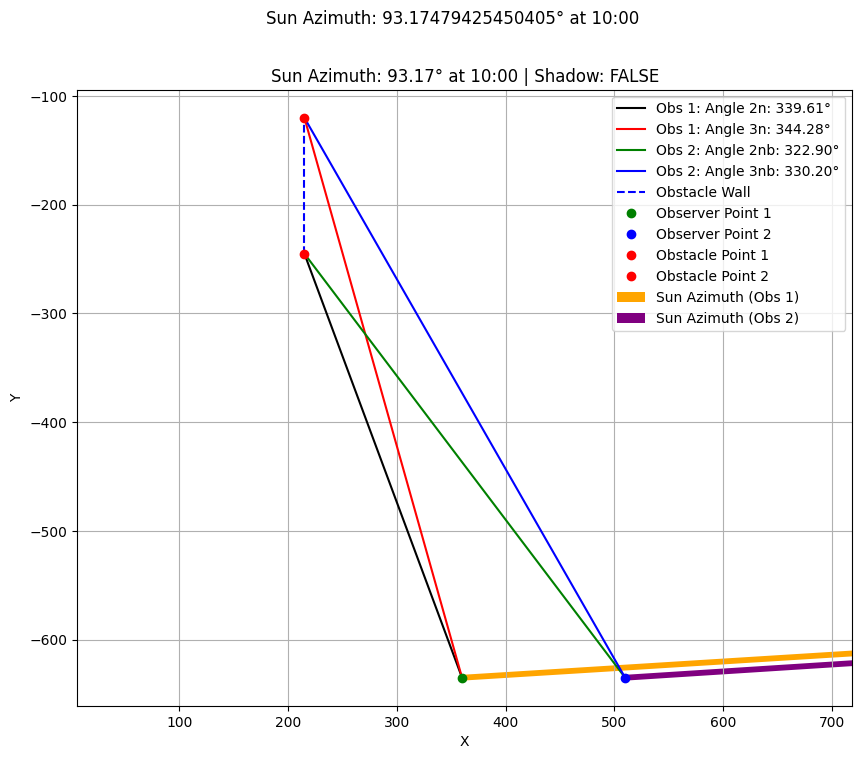

Time: 11:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


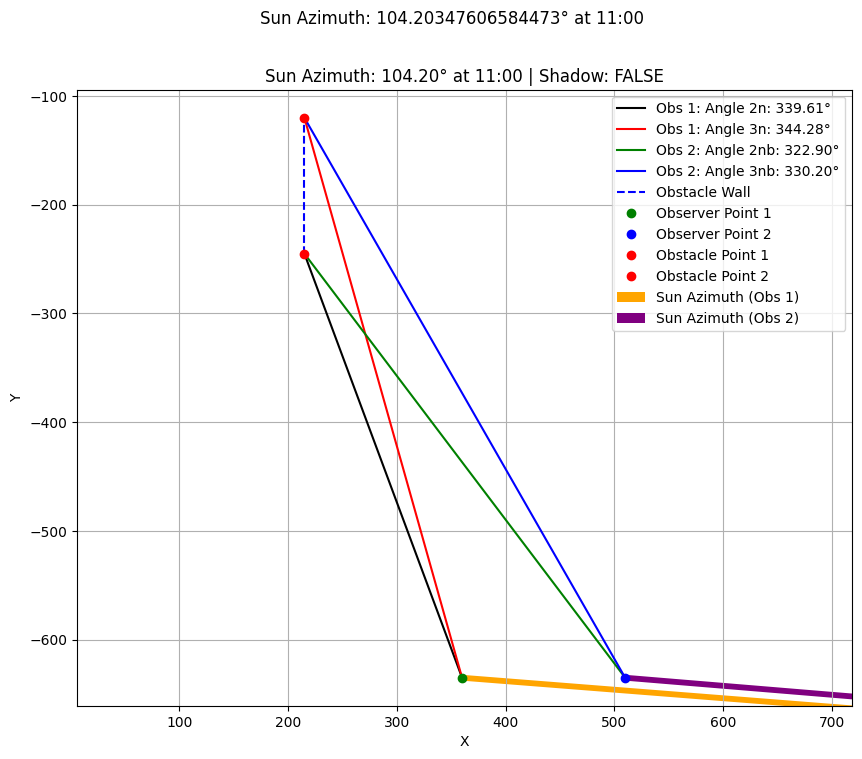

Time: 12:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


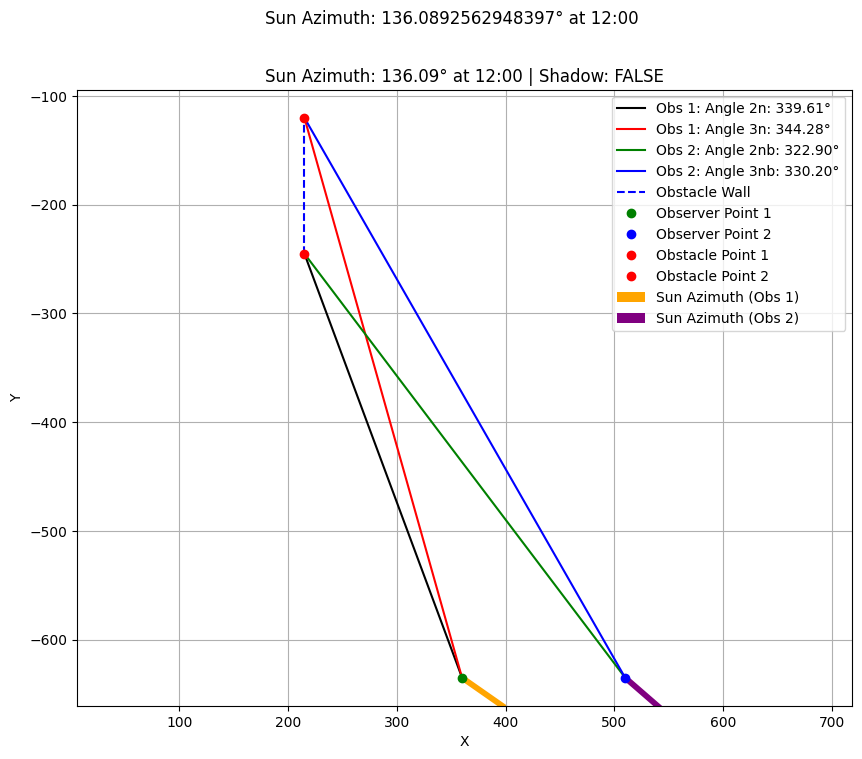

Time: 13:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


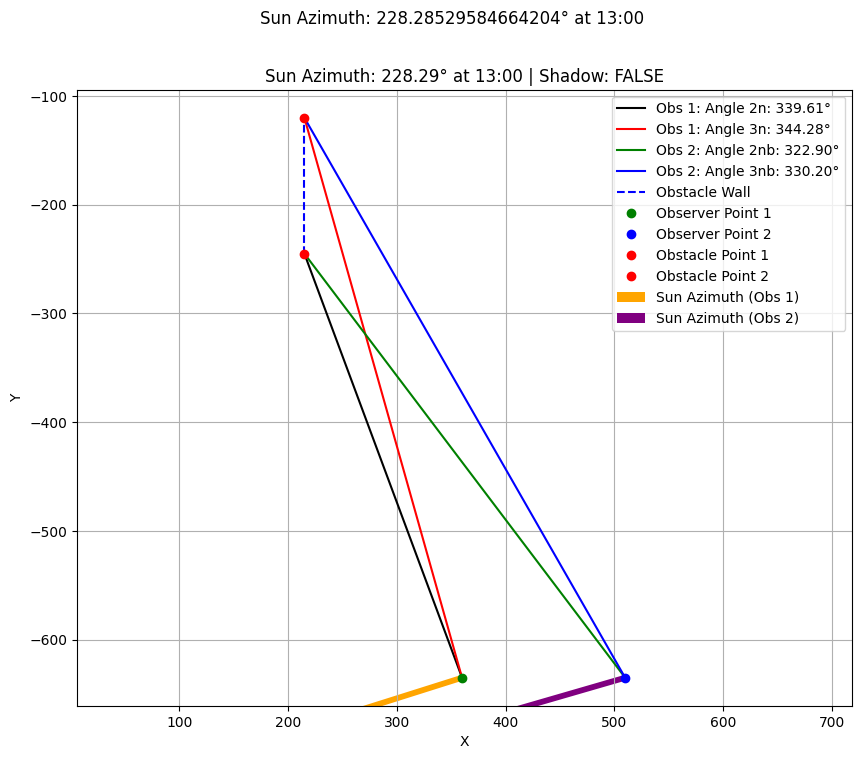

Time: 14:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


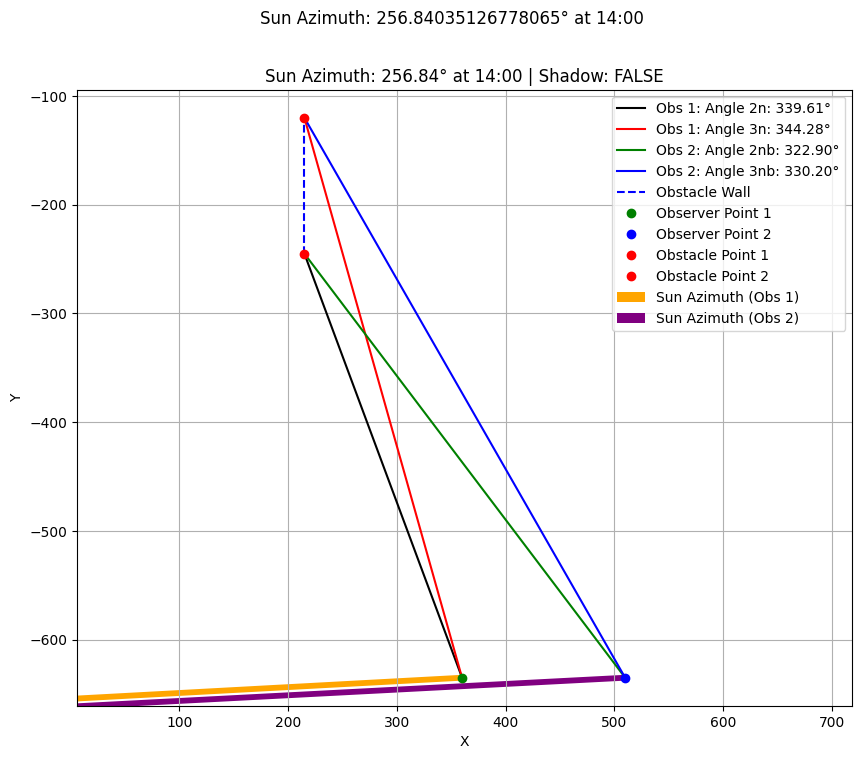

Time: 15:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


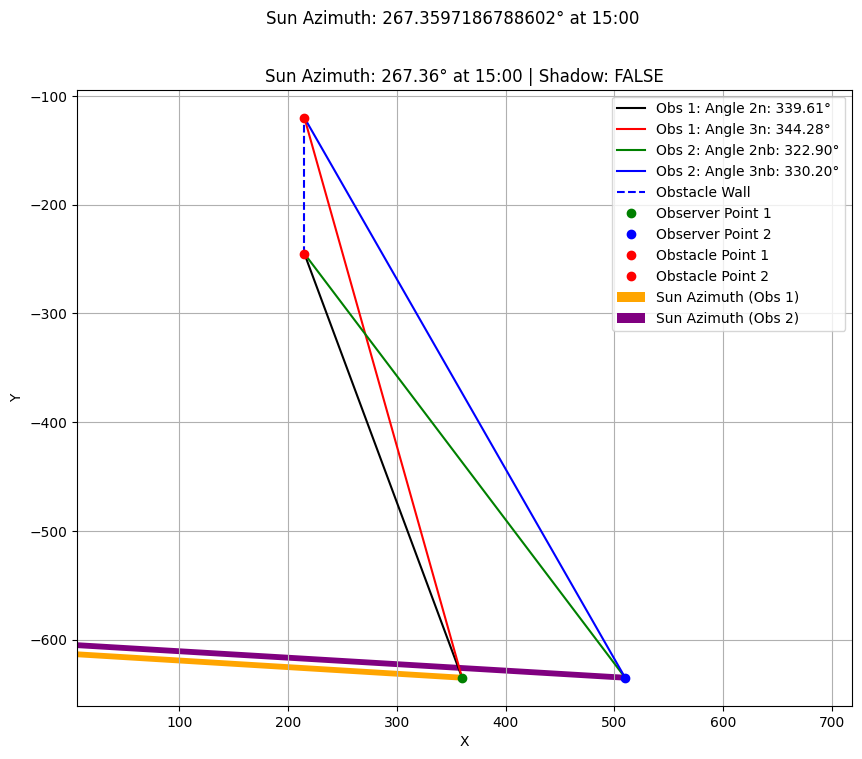

Time: 16:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


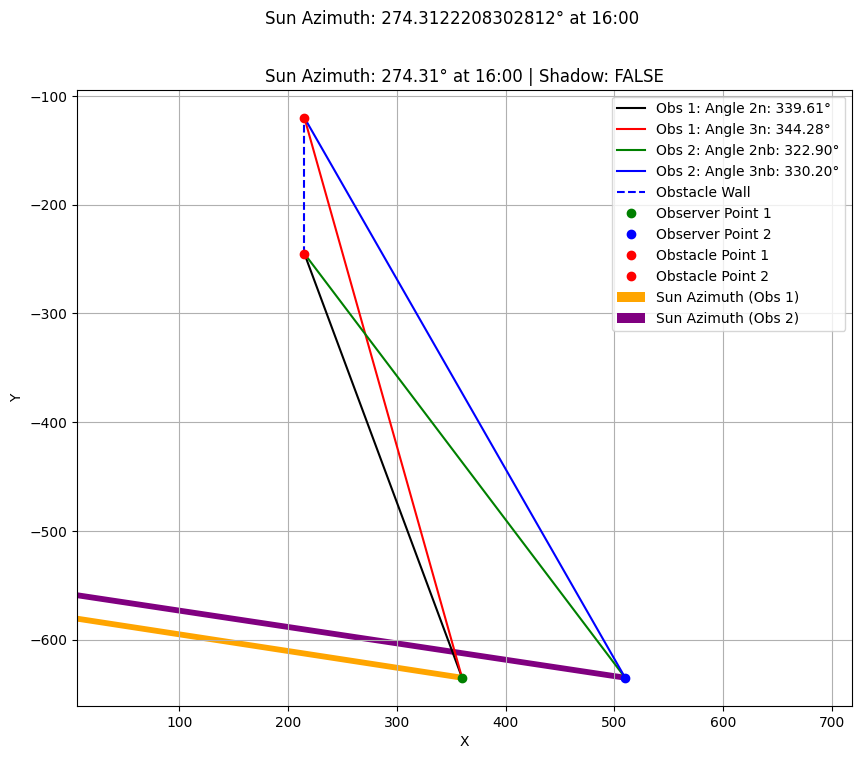

Time: 17:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


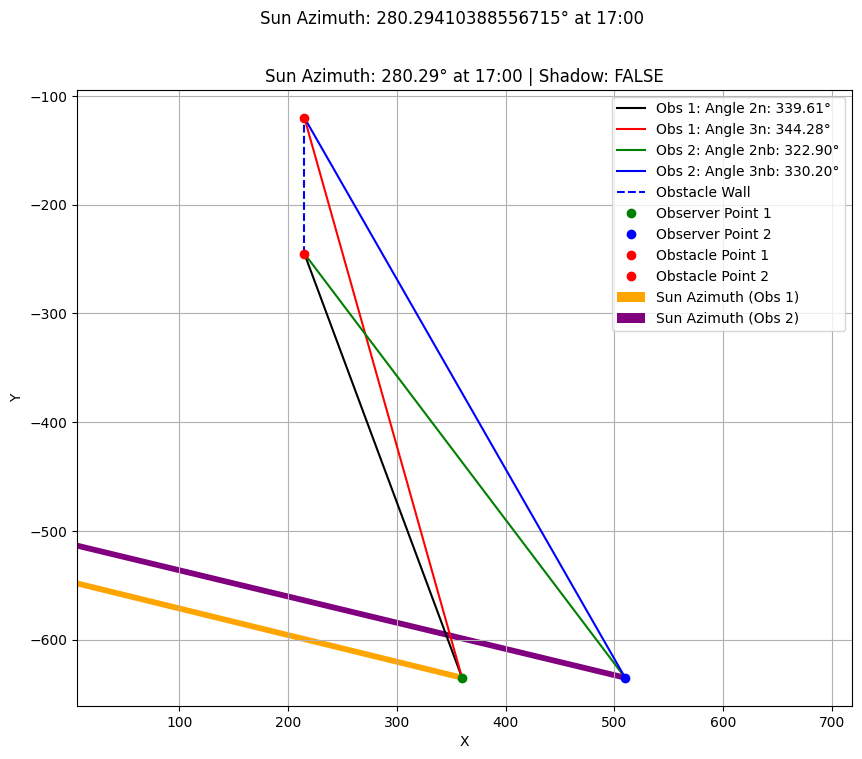

Time: 18:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


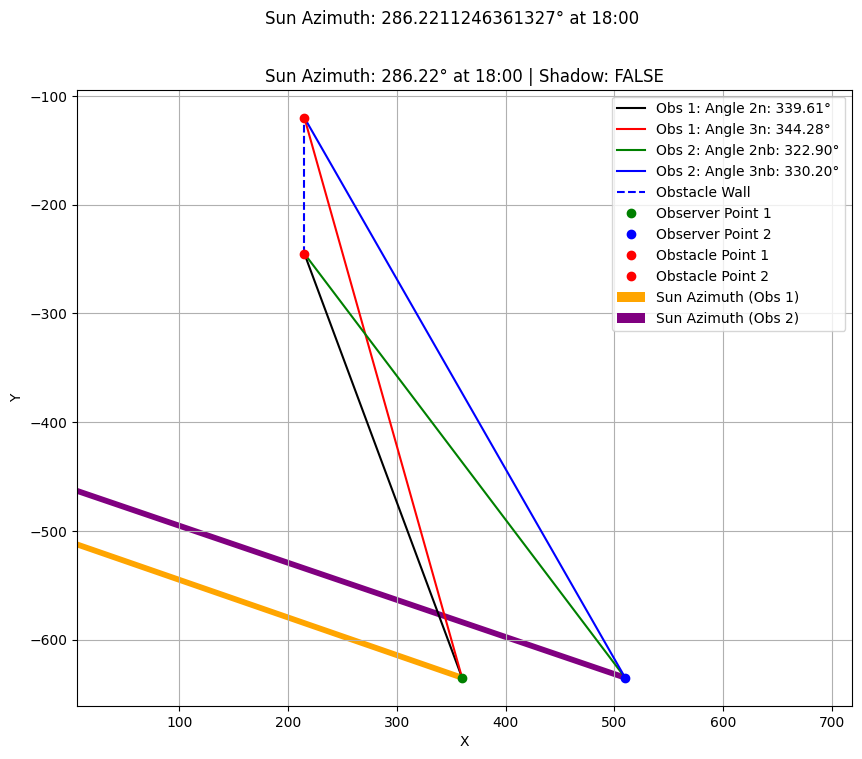

Time: 19:00
Observer 1 -> Angle 2n: 339.61°, Angle 3n: 344.28°, Shadow Status: FALSE
Observer 2 -> Angle 2nb: 322.90°, Angle 3nb: 330.20°, Shadow Status: FALSE


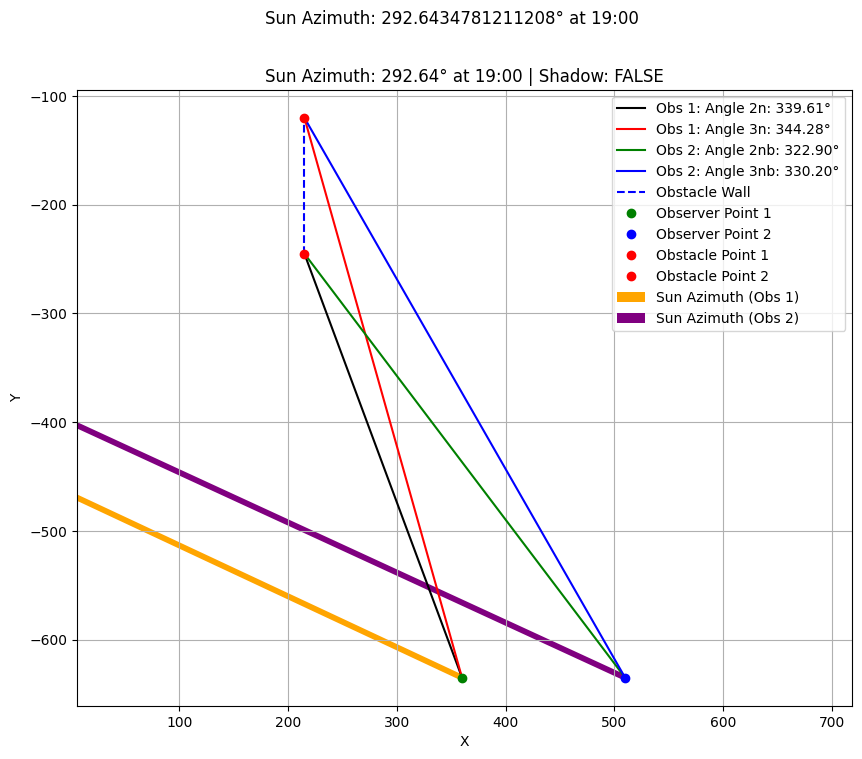

In [10]:
import math
import matplotlib.pyplot as plt
import pytz
import pysolar.solar as ps
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def angle_between_points(x1, y1, x2, y2):
    delta_x = x2 - x1
    # print('Delta_x:',delta_x)
    delta_y = y2 - y1
    # print("Delta_y:",delta_y)
    angle_rad = math.atan2(delta_y, delta_x)
    # print('Angle_rad:',angle_rad)
    angle_deg = math.degrees(angle_rad)
    # print('Angle_deg:', angle_deg)
    return angle_deg

def get_sun_data(latitude, longitude, date_time):
    # Convert date and time to datetime object
    timezone = pytz.timezone('Asia/Kolkata')

    # # Convert date_time to timezone
    date_time_local = timezone.localize(date_time)

    # # Calculate sun position using pysolar
    sun_elevation = ps.get_altitude(latitude, longitude, date_time_local)
    sun_azimuth = ps.get_azimuth(latitude, longitude, date_time_local)

    return sun_elevation, sun_azimuth

def shadow_output(angle1,azimuth,angle2):
    if angle1<= azimuth <=angle2 or angle1 >= azimuth >= angle2:
        return 'TRUE'
    else:
        return 'FALSE'

def spherical_to_cartesian(elevation, azimuth):
    r = 10000
    x = r * np.sin(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation))
    y = r * np.cos(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation))
    z = r * np.sin(np.deg2rad(elevation))
    return x, y, z

latitude = 28.4595
longitude = 77.0266

time = datetime.datetime(2023, 7, 15, 14, 0, 0)

elevation,azimuth=get_sun_data(latitude,longitude,time)
print("Sun Elevation: ", elevation," degrees")
print("Sun Azimuth: ", azimuth," degrees")

elevation_rad, azimuth_rad = np.deg2rad(elevation), np.deg2rad(azimuth)
# sun_x, sun_y, sun_z = spherical_to_cartesian(elevation_rad, azimuth_rad)

# Observer Wall Points
x1, y1 = 360, -635   # Observer Wall Point 1
x1b, y1b = 510, -635 # Observer Wall Point 2 (another observer point)
# Obstacle Wall Points
x2, y2 = 215, -245   # Obstacle Wall Point 1
x3 ,y3 = 215, -120  # Obstacle Wall Point 2

# Loop through hours from 6 AM to 7 PM
for hour in range(6, 20):
    time = datetime.datetime(2023, 7, 15, hour, 0, 0)

    # Calculate sun data
    elevation, azimuth = get_sun_data(latitude, longitude, time)
    if elevation <= 0:
        print(f"Skipping plot for {hour}:00, as sun is below the horizon.")
        continue

    # Calculate angles for both observer points
    angle_2 = angle_between_points(x1, y1, x2, y2)
    angle_3 = angle_between_points(x1, y1, x3, y3)
    angle_2n = (450 - angle_2)%360 if angle_2 > 90 and angle_2 < 180 else 90 - angle_2
    angle_3n = (450 - angle_3)%360 if angle_3 > 90 and angle_3 < 180 else 90 - angle_3

    # Repeat for second observer point (x1b, y1b)
    angle_2b = angle_between_points(x1b, y1b, x2, y2)
    angle_3b = angle_between_points(x1b, y1b, x3, y3)
    angle_2nb = (450 - angle_2b)%360 if angle_2b > 90 and angle_2b < 180 else 90 - angle_2b
    angle_3nb = (450 - angle_3b)%360 if angle_3b > 90 and angle_3b < 180 else 90 - angle_3b

    # Check shadow status for first observer point
    shadow_status_1 = shadow_output(angle_2n, azimuth, angle_3n)
    shadow_status_2 = shadow_output(angle_2nb, azimuth, angle_3nb)

    # Print angle information and shadow statuses
    print(f"Time: {hour}:00")
    print(f"Observer 1 -> Angle 2n: {angle_2n:.2f}°, Angle 3n: {angle_3n:.2f}°, Shadow Status: {shadow_status_1}")
    print(f"Observer 2 -> Angle 2nb: {angle_2nb:.2f}°, Angle 3nb: {angle_3nb:.2f}°, Shadow Status: {shadow_status_2}")

    # Sun's Cartesian coordinates for quiver plot (both observer points)
    sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

    # Plotting
    plt.figure(figsize=(10, 8))

    # Plot lines for observer 1 (x1, y1)
    plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle 2n: {angle_2n:.2f}°')
    plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle 3n: {angle_3n:.2f}°')

    # Plot lines for observer 2 (x1b, y1b)
    plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle 2nb: {angle_2nb:.2f}°')
    plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle 3nb: {angle_3nb:.2f}°')

    # Plot obstacle wall line
    plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

    # Plot observer and obstacle points
    plt.plot(x1, y1, 'go', label='Observer Point 1')
    plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
    plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
    plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

    # Plot sun azimuth for both observer points
    plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Obs 1)')
    plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Obs 2)')

    # Plot settings
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:00 | Shadow: {shadow_status_1}')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.suptitle(f"Sun Azimuth: {azimuth}° at {hour}:00")
    plt.show()

# TESTING RANDOM

## Inclined 1

In [5]:
# Define observer and obstacle points
observer_points = [(510, -830, 100), (600, -635, 100)]  # Two observer points
x2, y2, z2 = 400, -440, 100  # Obstacle wall point 1
x3, y3, z3 = 480, -635, 100  # Obstacle wall point 2
x1, y1, z1 = observer_points[0]  # Observer 1
x1b, y1b, z1b = observer_points[1]  # Observer 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\Random\Inclined_1'
os.makedirs(output_dir, exist_ok=True)

import os
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Function to determine the orientation based on cross product
def wall_orientation(cross_product1, cross_product2):
    if cross_product1 < 0 and cross_product2 < 0:
        return 'Front'  # Both negative
    elif cross_product1 > 0 and cross_product2 > 0:
        return 'Back'   # Both positive
    else:
        return 'Parallel'  # Mixed signs

# Function to calculate cross products and orientations
def calculate_cross_products(obstacle_data, observer_subset):
    cross_products = {}
    orientations = {}

    for tower_num in obstacle_data['tower_col'].unique():
        obstacle_tower = obstacle_data[obstacle_data['tower_col'] == tower_num]
        obstacle_vertices = obstacle_tower[['x_col', 'y_col']].to_numpy()

        # Observer wall vertices
        observer_vertices = observer_subset[['x_col', 'y_col']].to_numpy()

        cross_products[tower_num] = []
        orientations[tower_num] = []

        for i in range(len(observer_vertices) - 1):
            obs_vertex1 = observer_vertices[i]
            obs_vertex2 = observer_vertices[(i + 1) % len(observer_vertices)]

            for j, obs_building_vertex in enumerate(obstacle_vertices):
                # Calculate cross product for both obstacles
                cross_product1 = calculate_cross_product(obs_vertex1[0], obs_vertex1[1],
                                                          obs_vertex2[0], obs_vertex2[1],
                                                          obs_building_vertex[0], obs_building_vertex[1])
                
                cross_product2 = calculate_cross_product(obs_vertex1[0], obs_vertex1[1],
                                                          obs_vertex2[0], obs_vertex2[1],
                                                          obstacle_vertices[(j + 1) % len(obstacle_vertices)][0],
                                                          obstacle_vertices[(j + 1) % len(obstacle_vertices)][1])
                
                cross_products[tower_num].append((cross_product1, cross_product2))

                # Determine the orientation of the obstacle wall w.r.t. observer wall
                orientation = wall_orientation(cross_product1, cross_product2)
                orientations[tower_num].append(orientation)

    return cross_products, orientations

def get_sun_data(latitude, longitude, date_time):
    # Convert date and time to datetime object
    timezone = pytz.timezone('Asia/Kolkata')

    # # Convert date_time to timezone
    date_time_local = timezone.localize(date_time)

    # # Calculate sun position using pysolar
    sun_elevation = ps.get_altitude(latitude, longitude, date_time_local)
    sun_azimuth = ps.get_azimuth(latitude, longitude, date_time_local)

    return sun_elevation, sun_azimuth

latitude = 28.4595
longitude = 77.0266

# Sample obstacle data for testing
# Update obstacle data to have matching lengths
obstacle_data = {
    'tower_col': ['tower1', 'tower1'],  # Repeat the tower identifier for each obstacle point
    'x_col': [x2, x3],
    'y_col': [y2, y3]
}


# Convert obstacle data to DataFrame for easier handling
import pandas as pd
obstacle_df = pd.DataFrame(obstacle_data)

# Sample observer data for testing
# Note: Replace this with your actual observer data
observer_data = {
    'x_col': [x1, x1b],
    'y_col': [y1, y1b]
}

# Convert observer data to DataFrame for easier handling
observer_df = pd.DataFrame(observer_data)

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data
        elevation, azimuth = get_sun_data(latitude, longitude, time)  # Latitude and Longitude as needed
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products and orientations
        cross_products, orientations = calculate_cross_products(obstacle_df, observer_df)

        # Determine angles and shadow status for Observer 1
        obs1_cross_products = cross_products['tower1']
        obs1_orientation = orientations['tower1']

        angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)
        angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)

        # Determine angles and shadow status for Observer 2
        obs2_cross_products = cross_products['tower1']
        obs2_orientation = orientations['tower1']

        angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)
        angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


NameError: name 'calculate_cross_product' is not defined

## Inclined 2

In [62]:
# Observer and obstacle points
# Observer Wall Points
x1, y1 = 400, -830   # Observer Wall Point 1
x1b, y1b = 500, -635 # Observer Wall Point 2 (another observer point)
# Obstacle Wall Points
x2, y2 = 500, -635   # Obstacle Wall Point 1
x3 ,y3 = 600, -440  # Obstacle Wall Point 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\Random\Inclined_2'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 7:30
Obser

Time: 18:30
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False
Time: 18:45
Observer 1 -> Front Angle: 27.15°, Back Angle: -27.15°, Shadow Status: False
Observer 2 -> Front Angle: 0.00°, Back Angle: -27.15°, Shadow Status: False


## Inclined 3

In [63]:
# Define observer and obstacle points
observer_points = [(510, -830, 100), (600, -635, 100)]  # Two observer points
x2, y2, z2 = 400, -440, 100  # Obstacle wall point 1
x3, y3, z3 = 480, -635, 100  # Obstacle wall point 2

# Create a directory to save the plots
output_dir = r'C:\Users\Kalpesh\Downloads\NewApproach Sun Exposure (1)\NewApproach Sun Exposure\Testing\Azimuth New\Random\Inclined_3'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate azimuth based on the observer's position
def azimuth_wrt_north(x_obs, y_obs, x_target, y_target, is_front=True):
    delta_x = x_target - x_obs
    delta_y = y_target - y_obs
    
    # Calculate angle using atan2 (clockwise from north)
    angle_radians = np.arctan2(delta_x, delta_y)
    angle_degrees = np.degrees(angle_radians) % 360

    if not is_front:  # Assign negative sign for counterclockwise angles (back points only if one is in front, one is back)
        angle_degrees = -angle_degrees
    
    return angle_degrees

# Function to calculate cross product between vectors formed by observer and obstacle points
def calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    vec_obs_to_target1 = np.array([x_target1 - x_obs, y_target1 - y_obs])
    vec_obs_to_target2 = np.array([x_target2 - x_obs, y_target2 - y_obs])
    
    # Compute the cross product of the two vectors
    cross_product = np.cross(np.append(vec_obs_to_target1, 0), np.append(vec_obs_to_target2, 0))
    return cross_product[2]  # Return the z-component (sign determines front/back)

# Function to check if a point is in front or back relative to the observer using the cross product
def is_front_or_back(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2):
    cross_product = calculate_cross_product(x_obs, y_obs, x_target1, y_target1, x_target2, y_target2)
    return cross_product >= 0  # Positive means front, negative means back

# Function to check if the sun azimuth is within the shadow range (with negative angles for back points)
def shadow_output(angle_front, angle_back, sun_azimuth):
    # Handle counterclockwise angles (negative values)
    if angle_back < 0:
        angle_back += 360  # Adjust back angle to positive value
    
    if angle_front < 0:
        angle_front += 360  # Adjust front angle to positive value
    
    # Adjust sun azimuth if necessary (wrapping around)
    if sun_azimuth < angle_front:
        sun_azimuth += 360
    
    # Check if the sun's azimuth is within the range
    return angle_front >= sun_azimuth >= angle_back

# Loop through hours from 6 AM to 7 PM in 15-minute intervals
for hour in range(6, 19):
    for minute in [0, 15, 30, 45]:
        time = datetime.datetime(2023, 7, 15, hour, minute, 0)

        # Calculate sun data (assuming function get_sun_data provides elevation and azimuth)
        elevation, azimuth = get_sun_data(latitude, longitude, time)
        if elevation <= 0:
            print(f"Skipping plot for {hour}:{minute:02d}, as sun is below the horizon.")
            continue

        # Calculate cross-products to determine front/back for Observer 1 (x1, y1) relative to obstacle wall points
        obs1_is_front = is_front_or_back(x1, y1, x2, y2, x3, y3)
        obs2_is_front = is_front_or_back(x1b, y1b, x2, y2, x3, y3)

        # Handle observer 1 (x1, y1)
        if obs1_is_front:  # One obstacle in front, one in back
            angle_front_1 = azimuth_wrt_north(x1, y1, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_1 = azimuth_wrt_north(x1, y1, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_1 = azimuth_wrt_north(x1, y1, min(x2, x3), min(y2, y3), True)   # Use clockwise for both angles
            angle_back_1 = azimuth_wrt_north(x1, y1, max(x2, x3), max(y2, y3), True)   # Clockwise for back

        # Handle observer 2 (x1b, y1b)
        if obs2_is_front:  # One obstacle in front, one in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, x2, y2, True)   # Front: Clockwise (positive)
            angle_back_2 = azimuth_wrt_north(x1b, y1b, x3, y3, False)   # Back: Counterclockwise (negative)
        else:  # Both obstacles in front or both in back
            angle_front_2 = azimuth_wrt_north(x1b, y1b, max(x2, x3), max(y2, y3), True)   # Use clockwise for both angles
            angle_back_2 = azimuth_wrt_north(x1b, y1b, min(x2, x3), min(y2, y3), True)   # Clockwise for back

        # Check shadow status for both observer points based on azimuth ranges
        shadow_status_1 = shadow_output(angle_front_1, angle_back_1, azimuth)
        shadow_status_2 = shadow_output(angle_front_2, angle_back_2, azimuth)

        # Print angle information and shadow statuses
        print(f"Time: {hour}:{minute:02d}")
        print(f"Observer 1 -> Front Angle: {angle_front_1:.2f}°, Back Angle: {angle_back_1:.2f}°, Shadow Status: {shadow_status_1}")
        print(f"Observer 2 -> Front Angle: {angle_front_2:.2f}°, Back Angle: {angle_back_2:.2f}°, Shadow Status: {shadow_status_2}")

        # Sun's Cartesian coordinates for quiver plot (assuming spherical_to_cartesian is defined)
        sun_x, sun_y, _ = spherical_to_cartesian(elevation, azimuth)

        # Plotting
        plt.figure(figsize=(10, 8))

        # Plot lines for observer 1 (x1, y1)
        plt.plot([x1, x2], [y1, y2], 'k-', label=f'Obs 1: Angle Front: {angle_front_1:.2f}°')
        plt.plot([x1, x3], [y1, y3], 'r-', label=f'Obs 1: Angle Back: {angle_back_1:.2f}°')

        # Plot lines for observer 2 (x1b, y1b)
        plt.plot([x1b, x2], [y1b, y2], 'g-', label=f'Obs 2: Angle Front: {angle_front_2:.2f}°')
        plt.plot([x1b, x3], [y1b, y3], 'b-', label=f'Obs 2: Angle Back: {angle_back_2:.2f}°')

        # Plot obstacle wall line
        plt.plot([x2, x3], [y2, y3], 'b--', label='Obstacle Wall')

        # Plot observer and obstacle points
        plt.plot(x1, y1, 'go', label='Observer Point 1')
        plt.plot(x1b, y1b, 'bo', label='Observer Point 2')
        plt.plot(x2, y2, 'ro', label='Obstacle Point 1')
        plt.plot(x3, y3, 'ro', label='Obstacle Point 2')

        # Plot sun azimuth at observer points
        plt.quiver(x1, y1, sun_x - x1, sun_y - y1, scale=2000, color='orange', label='Sun Azimuth (Observer 1)')
        plt.quiver(x1b, y1b, sun_x - x1b, sun_y - y1b, scale=2000, color='purple', label='Sun Azimuth (Observer 2)')

        # Plot settings
        plt.xlabel('West-East')
        plt.ylabel('South-North')
        plt.title(f'Sun Azimuth: {azimuth:.2f}° at {hour}:{minute:02d} | Shadow: {shadow_status_1 or shadow_status_2}')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')

        # Save plot to file
        plot_filename = os.path.join(output_dir, f"sun_shadow_{hour:02d}_{minute:02d}.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the figure to free up memory


Time: 6:00
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 6:15
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 6:30
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 6:45
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 7:00
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 7:15
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 7:30

Time: 18:30
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
Time: 18:45
Observer 1 -> Front Angle: 0.00°, Back Angle: 11.59°, Shadow Status: False
Observer 2 -> Front Angle: 332.85°, Back Angle: -270.00°, Shadow Status: False
